# Urban Computing - Lab 1
#### The current document contains initial information about Python programming language. Students who are familiar with it can skip some steps. 

### Loop Plot
The code below constructs a live-plot visualization inside a for-loop. <br>
It gradually draws $x$,$y$ data points derived from the following trigonometric equations: $$x(t)=t-1.6\cdot cos(24t)\\y(t)=t-1.6\cdot sin(25t)$$ where $t \in \{0.01, 0.02, 0.03, ..., 0.18\}$<br>
Try to change some of the parameters (e.g. `hi_b`, `lo_b`,...) and see the differences.  

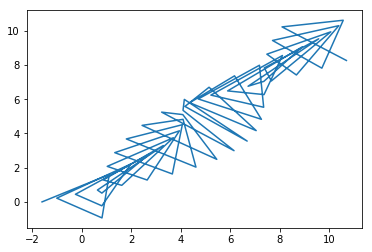

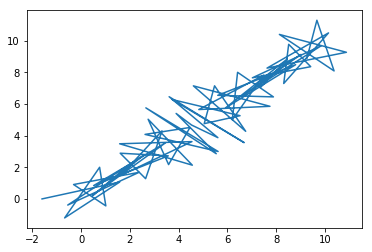

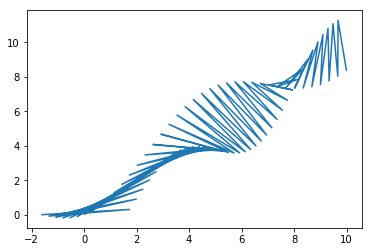

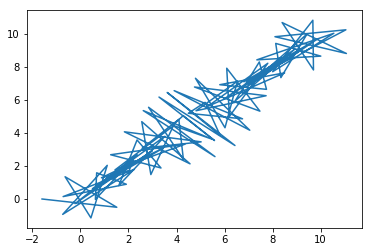

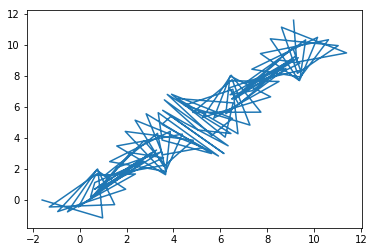

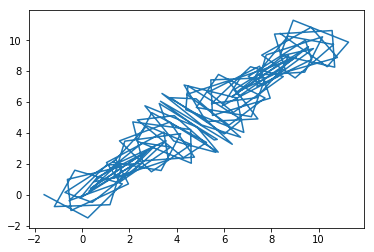

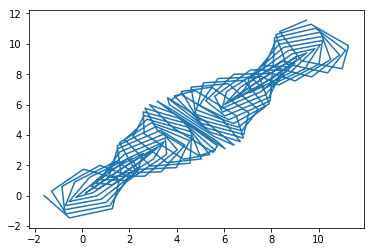

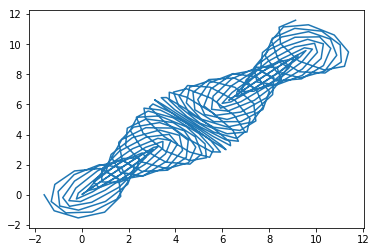

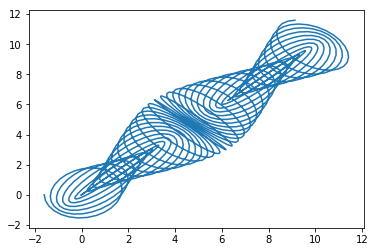

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def fx(t):
    return t - 1.6*np.cos(24*t)

def fy(t):
    return t-1.6*np.sin(25*t)

# Step Parameters for vector t
hi_b = 0.18
lo_b = 0.01
by = 0.02
step = np.arange(lo_b,hi_b, by)
step = np.flip(step)

# Live-Plot inside the for-loop
for st in step:
    t = np.arange(0,10,st)
    x = fx(t)
    y = fy(t)
    plt.figure()
    plt.plot(x,y)
    plt.pause(0.4)
plt.show()
    

In [2]:
np.__version__

'1.15.4'

### Exercise 1 - Plots
Use the previous information and visualize your own live-plot using the following trigonometric equations:
$$x(u) = sin(33u)cos(9u)\\
y(u) = sin(40u)sin(7u)$$<br>
A correct image at the end, if everything was written correctly, is something like the following: <img src="plt.png">

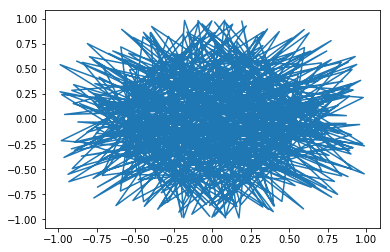

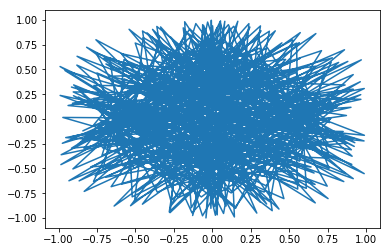

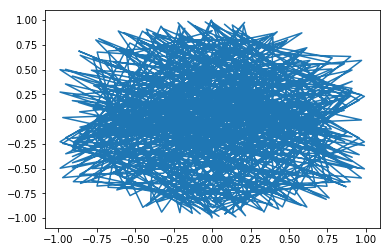

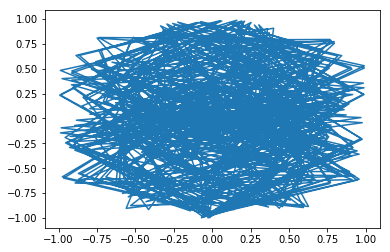

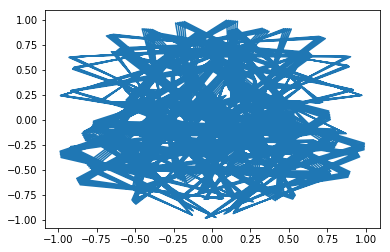

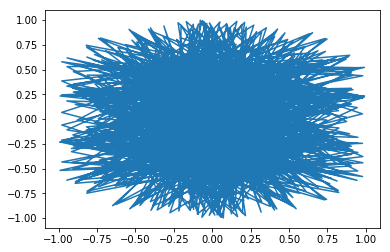

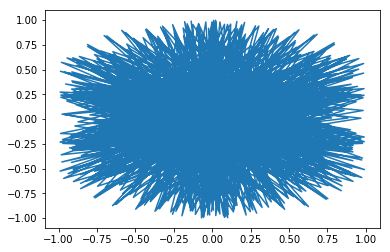

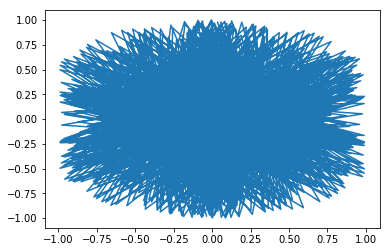

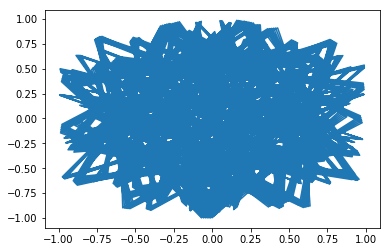

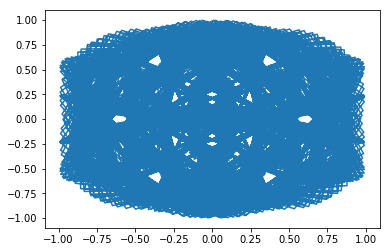

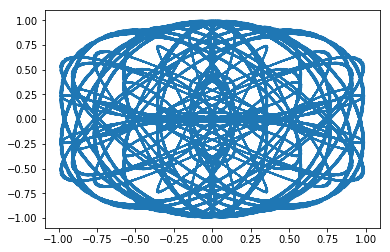

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def fx(t):
    return np.sin(33*t)*np.cos(9*t)

def fy(t):
    return np.sin(40*t)*np.sin(7*t)

# Step Parameters for vector t
hi_b = 0.22
lo_b = 0.01
by = 0.02
step = np.arange(lo_b,hi_b, by)
step = np.flip(step)

# Live-Plot inside the for-loop
for st in step:
    t = np.arange(0,100,st)
    x = fx(t)
    y = fy(t)
    plt.figure()
    plt.plot(x,y)
    plt.pause(0.4)
plt.show()

### Donwload APIs for Python
- #### Let's get familiar with some basic API's. 
    - Install the `openrouteservice` library. The current package provides a functional python-API for requesting geographical data directly from openrouteservice. Students have to create an account and get the API_KEY in order to be able to work with this library. You can find more information in the website [openrouteservice.org](https://openrouteservice.org/) where you can create your account, read the documentation and play around with online data request forms.

    - The second library is called `folium` and it provides API for map visualization. You can download it from [pypi.org/project/folium](https://pypi.org/project/folium/).

    - Please keep in mind that Anaconda users have to follow specific instructions for their anaconda-python-distribution for any package installation.

 - #### Using `openrouteservice`
     - Import the library, provide some coordinates and request the route. 
     - Try to understand the content of the routes dictionary 
     - Note that always we have to provide the api_key when we generate a client

In [3]:
import openrouteservice as opn
from openrouteservice.directions import directions
api_key='5b3ce3597851110001cf624869d05285ad1a4704abb4cef957e44279'
coords = ((8.34234,48.23424),(8.34423,48.26424))

client = opn.Client(key=api_key) # Specify your personal API key
routes = directions(client, coords) 
routes

{'bbox': [8.327707, 48.231946, 8.345244, 48.263552],
 'info': {'attribution': 'openrouteservice.org | OpenStreetMap contributors',
  'engine': {'build_date': '2018-12-18T14:13:47Z', 'version': '4.7.0'},
  'query': {'coordinates': [[8.34234, 48.23424], [8.34423, 48.26424]],
   'elevation': False,
   'geometry': True,
   'geometry_format': 'encodedpolyline',
   'instructions': True,
   'instructions_format': 'text',
   'language': 'en',
   'preference': 'fastest',
   'profile': 'driving-car',
   'units': 'm'},
  'service': 'routing',
  'timestamp': 1549390531015},
 'routes': [{'bbox': [8.327707, 48.231946, 8.345244, 48.263552],
   'geometry': 'mtkeHuv|q@~@VLHz@\\PR|@hBt@j@^n@L\\NjALv@Jh@NXi@zBm@jCKTy@z@qAhBa@\\[Ne@DgCc@i@?[Ty@hAi@zASRi@R}@H_@N[b@kAdCy@`Au@d@eA|@q@h@WRe@PYHYBqADgAAcAL_A^w@~@q@`@w@Zw@Cm@K[PeA|Aa@p@g@fAiAhBuAv@]VU^k@xAUXe@TqATy@V}@f@_@V[MUWqA_FKy@Me@_@cAu@{Ae@c@aAfBaAv@g@rBm@|@w@x@m@^U@m@Ma@SI\\mAlEkAjC_AjC_ApCe@z@i@j@q@f@WLwAr@u@T}A\\wATU?WCs@[oA]]EmACUCg@SMaAi@mDQm@K}@Mq@

- #### Decode a PolyLine
The output of the `.directions` object is a json file by default. We can decode it to a simple dictionary which, in this case, is a GeoJSON-ready. We can simply do the following:

In [4]:
import openrouteservice 
from openrouteservice import convert
api_key='5b3ce3597851110001cf624869d05285ad1a4704abb4cef957e44279'
coords = ((8.34234,48.23424),(8.34423,48.26424))

client = openrouteservice.Client(key=api_key) # Specify your personal API key

# decode_polyline needs the geometry only
geometry = client.directions(coords)['routes'][0]['geometry']

decoded = convert.decode_polyline(geometry)

decoded # this has only the coordinates for the route.

{'coordinates': [[8.34427, 48.23383],
  [8.34415, 48.23351],
  [8.3441, 48.23344],
  [8.34395, 48.23314],
  [8.34385, 48.23305],
  [8.34332, 48.23274],
  [8.3431, 48.23247],
  [8.34286, 48.23231],
  [8.34271, 48.23224],
  [8.34233, 48.23216],
  [8.34205, 48.23209],
  [8.34184, 48.23203],
  [8.34171, 48.23195],
  [8.34109, 48.23216],
  [8.34039, 48.23239],
  [8.34028, 48.23245],
  [8.33998, 48.23274],
  [8.33945, 48.23315],
  [8.3393, 48.23332],
  [8.33922, 48.23346],
  [8.33919, 48.23365],
  [8.33937, 48.23433],
  [8.33937, 48.23454],
  [8.33926, 48.23468],
  [8.33889, 48.23497],
  [8.33843, 48.23518],
  [8.33833, 48.23528],
  [8.33823, 48.23549],
  [8.33818, 48.2358],
  [8.3381, 48.23596],
  [8.33792, 48.2361],
  [8.33725, 48.23648],
  [8.33692, 48.23677],
  [8.33673, 48.23704],
  [8.33642, 48.23739],
  [8.33621, 48.23764],
  [8.33611, 48.23776],
  [8.33602, 48.23795],
  [8.33597, 48.23808],
  [8.33595, 48.23821],
  [8.33592, 48.23862],
  [8.33593, 48.23898],
  [8.33586, 48.23932],
  

- #### Visualize the maps
    - Import `folium` library
    - Get familiar using the [link](https://python-visualization.github.io/folium/quickstart.html)
    - Try to plot a map using the the coordinates: 52.169709,4.457111 
    - Is the place on the map familiar to you?

In [5]:
import folium
# Set up folium map
map1 = folium.Map(location=([52.169709,4.457111]), zoom_start=17)
map1

- ### Visualize specific locations
    1. Plot the map around the previous location
    2. Specify University Buildings
    3. Request isochrones within some minutes walking from each building
    4. Draw the radius of isochrones (note the reversed coordinates)

In [6]:
import openrouteservice as opn
clnt = opn.Client(key=api_key) # Specify your personal API key
# 1. Map
map1 = folium.Map(location=([52.169709,4.457111]), zoom_start=16)

# 2. Set up the building dictionary with real coordinates
bld_dict = {'Archeologie': {'location': [4.464366,52.165078]},
            'Gorlaeus': {'location': [ 4.459992, 52.167412]},
            'Jansen': {'location': [4.455754,52.167730]},
            'Chemistry': {'location': [4.459306,52.168101]}
           }

# 3. Request of isochrones with 2 minute footwalk.
params_iso = {'profile': 'cycling-road',
              'intervals': [120], # 120/60 = 2 mins
              'segments': 120,
              'attributes': ['total_pop'] # Get population count for isochrones
             }

# 4. Add the isochrones to the map and visualize it
for name, bld in bld_dict.items():
    params_iso['locations'] = bld['location'] # Add buildings coords to request parameters
    bld['iso'] = clnt.isochrones(**params_iso) # Perform isochrone request
    folium.features.GeoJson(bld['iso']).add_to(map1) # Add GeoJson to map
    
    folium.map.Marker(list(reversed(bld['location'])), # reverse coords due to folium syntax:Latitude/Longitude of Map (Northing, Easting).
                      icon=folium.Icon(color='lightgray',
                                        icon_color='#cc0000',
                                        icon='home',
                                        prefix='fa',
                                       ),
                      popup=name,
                 ).add_to(map1) # Add apartment locations to map

map1

- ###  Foursquare API
Visit [foursquare](https://developer.foursquare.com/places-api) site and create a developer free account. Start an app and install [foursquare-python-API](https://pypi.org/project/foursquare/) by typing on a terminal: ``` pip install foursquare```, or download it from the site. 

The following block of code provides some information about how to use `foursquare-API` in python. All you need is to create a developer's account and connect it using the `client_id` and `client_secret` hash from your application in [foursquare](https://developer.foursquare.com/places-api). Then, you create a client object and use it for data request. Please have a look at the [foursquare-documentation](https://developer.foursquare.com/docs).<br>
The specific example requests all bars in specific radius from the Leiden center.

In [7]:
import foursquare as fsq

# Please copy paste your client_id and client_secret from your web foursquare-app
cl_id='TLE3F5Q4JLFJZKBXMDUGLRG5AVTDTYU1YIESEOXRVPYIPX23'
cl_sec='YLXYQ55ZBSQZAYBHD1LD5EUFCQODSSOQXHERYFPVBN0MTR24'

# Construct the client object
client = fsq.Foursquare(client_id=cl_id, client_secret=cl_sec)

# Make a request
## Request specificaly for venues near the ceneter of Leiden  
### ll     --> latitude/longitude
### query  --> type of venue 
### intent --> intent performing search
### radius --> Limit results to venues within this
### limit  --> Number of results to return, up to 50
data = client.venues.search(params={'ll': '52.160236, 4.497012', 'query': 'bar', 
                                    'intent': 'browse', 'radius':300, 'limit':50})
print('Bars near my house: ' + str(len(data['venues'])))

Bars near my house: 4


### Exercise 2 - Foursquare
#### a. Index the requested dictionary and convert it into a pandas DataFrame
1. Request from foursquare all possible venues within 3000 radius of the Leiden center. Use the coordinates: 52.159536, 4.491366 
2. Make a function with input a dictionary
2. Index the dictionary and get interesting information
3. Make a DataFrame from that dictionary with the following information in columns: name, latitude, longitude, distance, address, genre (pluralName)
4. You noticed that in many cases some of the information is missing. Make sure that your DataFrame is loaded with the correct information from the dictionary where it was possible, anywhere else fill in with 'NA'. 
5. Return the dataframe

In [8]:
import pandas as pd
data = client.venues.search(params={'ll': '52.159536, 4.491366', 'query': 'bar', 
                                    'intent': 'browse', 'radius':3000, 'limit':50})
def venue_scraper(data):
    print(len(data['venues']))
    d = {'name' : [], 'lat':[], 'lng': [], 'dist': [], 'address': [], 'genre': []}
    for i in range(len(data['venues'])):
        d['name'].append(data['venues'][i]['name'])
        d['lat'].append(data['venues'][i]['location']['lat'])
        d['lng'].append(data['venues'][i]['location']['lng'])
        d['dist'].append(data['venues'][i]['location']['distance'])
        if 'address' in data['venues'][i]['location'].keys():
            d['address'].append(data['venues'][i]['location']['address'])
        else:
            d['address'].append('NA')
        if data['venues'][i]['categories'] != []:
            d['genre'].append(data['venues'][i]['categories'][0]['pluralName'])
        else:
            d['genre'].append('NA')
    df = pd.DataFrame.from_dict(d)
    return d, df
        
di, df=venue_scraper(data)                                        
df        
    

50


,name,lat,lng,dist,address,genre
0,Bar-Dancing De Kroon,52.163177,4.494783,467,Langegracht 65,Gay Bars
1,Cosmo Blow Dry Bar,52.159146,4.490836,56,Aalmarkt 22,Salons / Barbershops
2,Rooftop Bar,52.164953,4.488021,644,NA,NA
3,Bar Lokaal,52.157281,4.494333,322,NA,Bars
4,Bårr Tipi Bar,52.158026,4.491478,168,Stadhuisplein,Bars
5,Ocean Bar (Holiday Inn),52.163967,4.456371,2440,NA,Hotel Bars
6,The Garden Grill & Bar,52.169912,4.453280,2845,Willem Einthovenstraat 3,Hotel Bars
7,Hudson Bar & Kitchen,52.163390,4.486174,556,Nieuwe Beestenmarkt 15-21,American Restaurants
8,Takkie Apres ski Bar,52.159441,4.491379,10,NA,NA
9,Bar Bruut,52.162798,4.484706,581,Steenstraat 22,Bars


#### b. Count the frequencies of the different venue types (genres)
Search in [pandas-documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) and try to answer the following:
1. Count the frequencies of each venue-type.
2. Count the number of NA values.
3. Find the nearest venue in the center of Leiden.
4. Find the most distant venue from the center.

In [9]:
# Count frequencies
x= df.groupby(['genre']).size()
print('Frequencies of Venue-Types\n\n' + str(x))

# Find NA and count their frequencies
NA_count = x['NA']
print('\nFrquency of NA: ' + str(NA_count))

# Nearest venue
near_venue=df.loc[df['dist']==min(df['dist']), ['name']].iloc[0]['name']
# Distant venue
far_venue=df.loc[df['dist']==max(df['dist']), ['name']].iloc[0]['name']

print('\nClosest Venue: ' + str(near_venue) + '\nDistant Venue: ' + str(far_venue))

Frequencies of Venue-Types

genre
American Restaurants                            1
Art Galleries                                   1
Bars                                           10
Beer Gardens                                    1
Business Services                               1
Cafés                                           1
Castles                                         1
Coffee Shops                                    1
Construction & Landscaping                      2
Delis / Bodegas                                 1
Doctor's Offices                                1
Dutch Restaurants                               1
Fraternity Houses                               1
Gay Bars                                        1
Gyms                                            1
Hotel Bars                                      2
Hotels                                          1
Italian Restaurants                             2
NA                                              4
Nightclubs      

#### c. Visualize Frequencies 
Plot a barplot for venue-types (genre), using pandas and matplotlib, only for frequencies which are:
$\text{genre}\geq2$. Barplots are suitable graphs for frequencies visualization but it is not the only way. Find another proper way to visualize those frequencies.


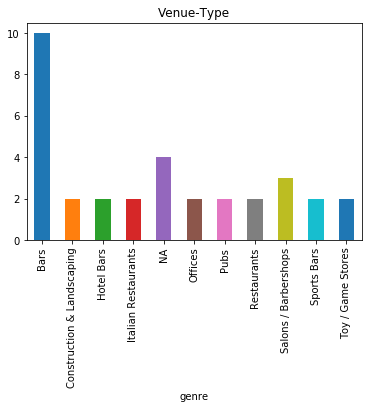

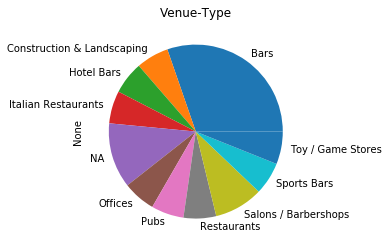

In [10]:
x= df.groupby(['genre']).size()

# Query the dataframe for values bigger or equal than 2
x= x[x>=2]

# Plot bar
plt.figure()
x.plot(kind='bar',title='Venue-Type')
plt.show()
# Plot pie
plt.figure()
x.plot(kind='pie', title='Venue-Type')
plt.show()


#### d. Visualize locations in maps
Use all previous information and draw pins for all venues in the center of leiden.<br>
Open a map using folium and initialize it with Leiden center coordinates: 52.159536, 4.491366.<br> Then, plot all the venues from the dataframe.

In [11]:
import folium
# Make a list with the coordinates of each location
locations = df[['lat', 'lng']]
locationlist = locations.values.tolist()

# Open a map and initialize it with the coordinates
map = folium.Map(location=[52.159536, 4.491366], zoom_start=15)
# add to the map all different locations
# use the parameter 'popup=' to include the name of each venue
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['name'][point]).add_to(map)
map

### Exercise 3 - Regression
#### Linear Model
In this exercise we want to predict the distance from the center of Leiden using the two coordinates: lat and lng from each venue. You have to calculate $\hat{y} = \alpha\cdot x_1 + \beta \cdot x_2 + \gamma$ where $x_1=\text{latitude}$, $x_2=\text{longitude}$ and $\alpha$, $\beta$ the slope and $\gamma$ the intercept of the linear regression. This equation is using two regressors, $x_1, x_2$ and one response variable $\hat{y}$ which indicates the expected distance. Follow the steps below and provide code for the calculation of this linear-model.
1. Assign the correct columns of your dataframe into objects $x_1, x_2$ and $y$
2. Split these objects into train/test set. For the trainset we need 35 random values from $x_1, x_2, y$ and the rest 15 fort he testset.
3. Make three new objects $x_1\_train, x_2\_train, y\_train$ for the trainset
4. Do the same for the testset $x_1\_test, x_2\_test, y\_test$ 
5. Check [numpy-documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.linalg.html) for linear-regression and least squares
6. Calculate $\alpha, \beta$ and $\gamma$ coefficients by fitting the linear model on the trainset
7. Calculate $\hat{y}$ for the trainset and testset using the regression coefficients (Remember that we fit the model only on the trainset, we calculate the coefficients and then we use them to predict the testset)
8. Measure two basic error-metrics Root Mean Square Error (RMSE) and Mean Absolute Error (MAE) using the following equations:
$$\text{RMSE} = \sqrt{\frac{\sum_{i=1}^{n} (y_i-\hat{y}_i)^{2}}{n}}\\
\text{MAE} = \frac{\sum_{i=1}^{n} |y_i - \hat{y}_i|}{n}$$<br>
where $y_i$ indicates the ground truth (the real distance) and $\hat{y}_i$ the distance prediction from the trained model. You can measure the two errors for both datasets train and test (we always care about the error on the testset).
9. Run this simulation many times and inspect the two error metrics. Think why errors on testset are usually bigger than the trainset 
10. Plot the residuals graph

In [12]:
import numpy as np

# Construct Data
x1 , x2 = df['lat'], df['lng']
y = df['dist']

# Make a vector with values 0-50
# Randomly shuffle it
# Take 35 values for trainset and the rest 15 for testset
indx = np.arange(50)
np.random.shuffle(indx)
train_indx = indx[0:35]
test_indx = indx[35:]

# Make the train arrays
x1_train, x2_train = x1[train_indx], x2[train_indx]
y_train = y[train_indx]
# Make the test arrays
x1_test, x2_test = x1[test_indx], x2[test_indx]
y_test = y[test_indx]

# Make a matrix with the two regressors using np.vstack 
A = np.vstack((x1_train, x2_train, np.ones(len(x1_train)))).T
# Find linear-regression coefficients a,b,g using least-squares
alpha, beta, gamma = np.linalg.lstsq(A, y_train, rcond=1)[0]  

# Calculate predictions for y_train_hat and y_test_hat
y_train_hat = alpha*x1_train + beta*x2_train + gamma
y_test_hat = alpha*x1_test + beta*x2_test + gamma

def RMSE(true, pred):
    return np.sqrt(np.mean((true - pred) ** 2))
def MAE(true, pred):
    return np.mean(np.abs(true - pred))

print('RMSE-Train: ' + str(RMSE(y_train,y_train_hat)) + '| RMSE-Test: ' + str(RMSE(y_test,y_test_hat)))
print('MAE-Train: ' + str(MAE(y_train,y_train_hat)) + '| MAE-Test: ' + str(MAE(y_test,y_test_hat)))

RMSE-Train: 649.9640835773032| RMSE-Test: 687.2750637539735
MAE-Train: 557.3809885835807| MAE-Test: 533.7364115443702


#### Visualize the Residuals Vs Fitted plot, it illustrates the distribution of the residuals (error) for the corresponding fitted value of $\hat{y}$ of the whole dataset. 

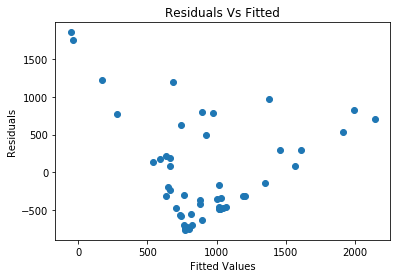

In [13]:
# Get all y and y_hat values
y_trth = np.hstack((y_test.values,y_train.values))
y_hat = np.hstack((y_test_hat.values, y_train_hat.values))
# Caluclate the residual by substracting: y_true - y_hat
res = y_trth - y_hat
# Plot a scatter plot with fitted values on x'axis and residuals on y'axis
# Provide titles and axis labels
plt.figure()
plt.scatter(y_hat, res)
plt.title('Residuals Vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()